**IMPORTS**

In [1]:
import talib
import pandas as pd
from talib import SMA
from talib import T3
from talib import WMA
from talib.abstract import *
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import os

**GETTING CSV**

In [5]:
def get_df(csv):
    df=pd.read_csv(csv,parse_dates=True)
    #df=df.set_index('time')
    return df
def getpartialcsv(csv,date1,date2):
    df=get_df(csv)
    df=df.set_index('time')
    newdf=df.loc[date1:date2,'PriceUSD']
    newcsv=newdf.to_csv('PartialCSV.csv')
    dffinal=get_df('PartialCSV.csv')
    return dffinal


**MOVING AVERAGE**

*SMA* = Simple Moving Average. calculated by adding recent prices and then dividing that figure by the number of time periods in the calculation average.

*T3* = Triple Exponential Moving Average.  takes multiple exponential moving averages (EMA) of the original EMA and subtracting out some of the lag.

*WMA* = Weighted Moving Average. The weighted moving average is calculated by multiplying each observation in the data set by a predetermined weighting factor

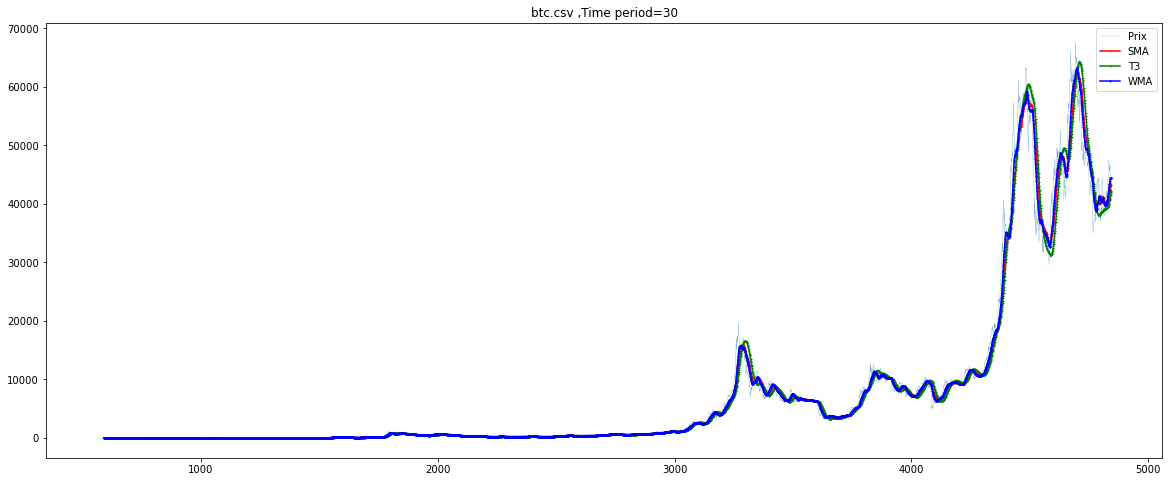

In [6]:
def get_graphe_comp(csv,TA1,TA2,TA3,timep):
    df=get_df(csv)
    
    priceusd=df['PriceUSD']
    if(TA1=='SMA'):
        df[TA1] = SMA(priceusd,timep) 
        color1='red'
    if(TA2=='T3'):
        df[TA2] = T3(priceusd,timep)
        color2='green'
    if(TA3=='WMA'):
        df[TA3] = WMA(priceusd,timep) 
        color3='blue'
    fig, ax = plt.subplots(figsize = (20, 8))
    
    ax.plot(priceusd, linestyle='-', 
            linewidth=0.2, label='Prix')
    ax.plot(df[TA1],marker='.',markersize=1,color=color1, label=TA1)
    ax.plot(df[TA2],marker='+',markersize=1,color=color2, label=TA2)
    ax.plot(df[TA3],marker='o',markersize=1,color=color3, label=TA3)
    ax.legend();
    plt.title(csv+" ,Time period="+str(timep))

get_graphe_comp('btc.csv','SMA','T3','WMA',30)


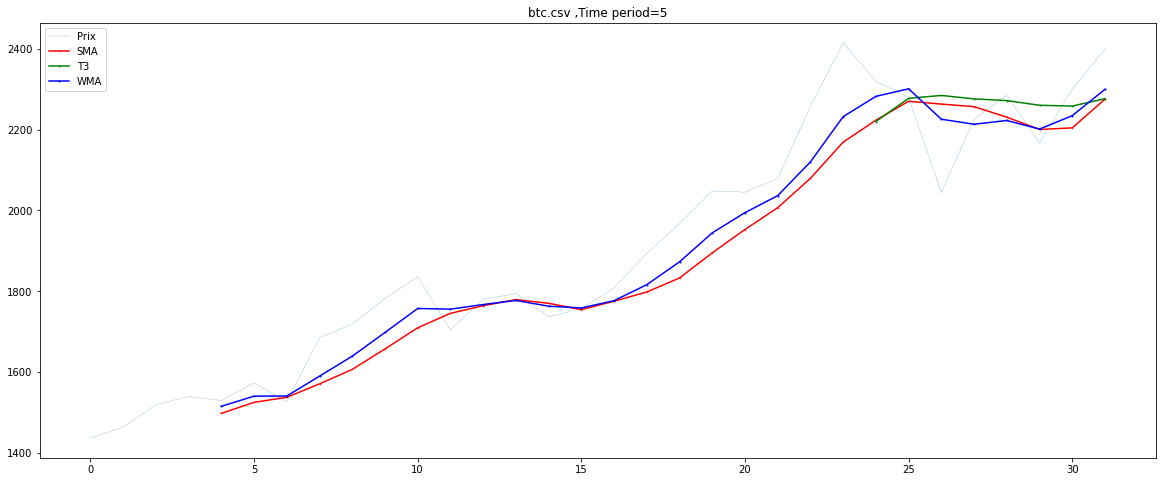

In [7]:
def get_graphe_comp(csv,TA1,TA2,TA3,timep,date1,date2):
    df=getpartialcsv(csv,date1,date2)
    priceusd=df['PriceUSD']
    if(TA1=='SMA'):
        df[TA1] = SMA(priceusd,timep) 
        color1='red'
    if(TA2=='T3'):
        df[TA2] = T3(priceusd,timep)
        color2='green'
    if(TA3=='WMA'):
        df[TA3] = WMA(priceusd,timep) 
        color3='blue'
    fig, ax = plt.subplots(figsize = (20, 8))
    
    ax.plot(priceusd, linestyle='-', 
            linewidth=0.2, label='Prix')
    ax.plot(df[TA1],marker='.',markersize=1,color=color1, label=TA1)
    ax.plot(df[TA2],marker='+',markersize=1,color=color2, label=TA2)
    ax.plot(df[TA3],marker='o',markersize=1,color=color3, label=TA3)
    ax.legend();
    plt.title(csv+" ,Time period="+str(timep))

get_graphe_comp('btc.csv','SMA','T3','WMA',5,"2017-05-01","2017-06-01")



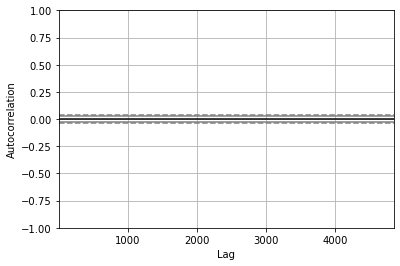

In [40]:
df=get_df('btc.csv')
priceusd=df['PriceUSD']
df['SMA'] = SMA(priceusd,10) 
x = pd.plotting.autocorrelation_plot(df['SMA'])
# plotting the Curve
x.plot()
# Display
plt.show()